# **Detecting Fake Job Postings with Data Analysis**

### **About Dataset**

This dataset contains a curated list of exclusively 10k fake job postings, intended to assist researchers, data scientists, and analysts in studying fraudulent recruitment patterns and scam tactics. By focusing solely on fake job listings, the dataset provides an opportunity to:

**1.** Develop and test machine learning models to detect fraudulent job postings.

**2.** Understand the linguistic and structural characteristics of fake job advertisements.

**3.** Investigate the impact of fake job postings on job seekers and recruitment platforms.

The dataset includes attributes such as job title, company name, location, and detailed descriptions of fake postings. It is ideal for analyzing how scammers operate in the digital recruitment space and for building tools to combat online employment scams.

### About this file
*This Data set contains of 10K real time fake jobs with no real jobs*

# **Data Overview**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load the data set
file_path = '/content/Fake Postings.csv'
df = pd.read_csv(file_path)

# display the first few rows of the dataframe
df.head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
1,Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
2,"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
3,Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
4,"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


# **Exploratory Data Analysis**

Let's explore the dataset to understand the distribution of features and identify any patterns.



In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

title              0
description        0
requirements       0
company_profile    0
location           0
salary_range       0
employment_type    0
industry           0
benefits           0
fraudulent         0
dtype: int64


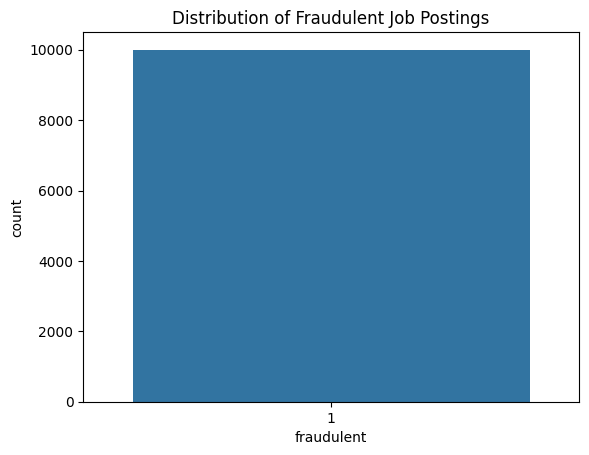

In [6]:
# Distribution of the target variable 'fraudulent'
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

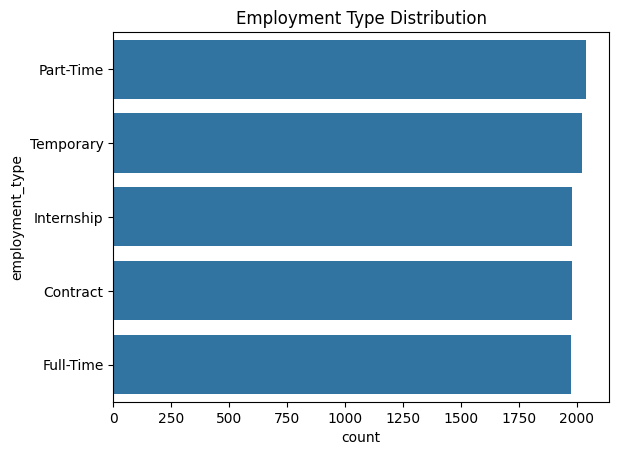

In [7]:
# Visualize the distribution of employment types
sns.countplot(y='employment_type', data=df, order=df['employment_type'].value_counts().index)
plt.title('Employment Type Distribution')
plt.show()

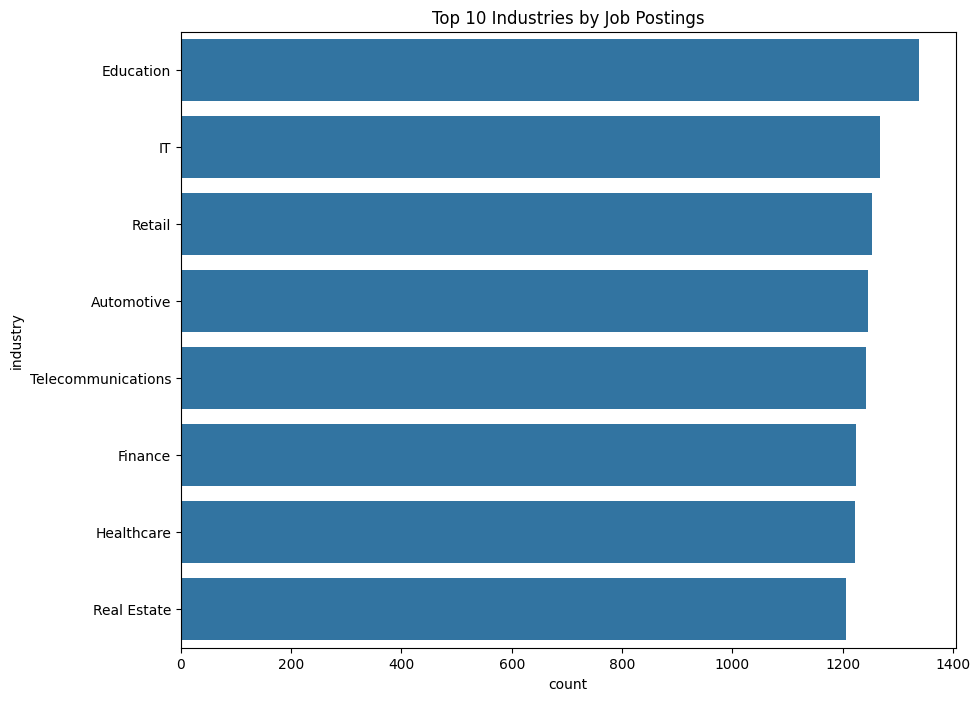

In [8]:
# Visualize the distribution of industries
plt.figure(figsize=(10, 8))
sns.countplot(y='industry', data=df, order=df['industry'].value_counts().index[:10])
plt.title('Top 10 Industries by Job Postings')
plt.show()

# **Data Preprocessing**

Before diving into model building, we need to preprocess the data. This includes handling missing values, encoding categorical variables, and extracting features from text columns.

In [9]:
# Fill missing values with a placeholder
df.fillna('Unknown', inplace=True)

# Encode the target variable
df['fraudulent'] = df['fraudulent'].astype(int)

# **Feature Engineering**

Let's create some features from the text columns that might help in identifying fraudulent job postings.

In [10]:
# Feature: Length of the job description
df['description_length'] = df['description'].apply(len)

# Feature: Number of requirements listed
df['num_requirements'] = df['requirements'].apply(lambda x: len(x.split(',')))

# **Model Building**
We'll use a simple logistic regression model to predict whether a job posting is fraudulent.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target
features = ['description_length', 'num_requirements']
X = df[features]
y = df['fraudulent']

# Ensure there are at least two classes in the target variable
if len(y.unique()) < 2:
    print("The target variable 'fraudulent' must have at least two classes. Exiting...")
else:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

The target variable 'fraudulent' must have at least two classes. Exiting...


# **Model Evaluation**
Let's evaluate the model's performance using accuracy, confusion matrix, and classification report.

In [21]:
# Predict on the test set
if len(y.unique()) >= 2:
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

In [22]:
# Confusion matrix
if len(y.unique()) >= 2:
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [23]:
# Classification report
if len(y.unique()) >= 2:
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy:.2f}')

# **Sentiment analysis**

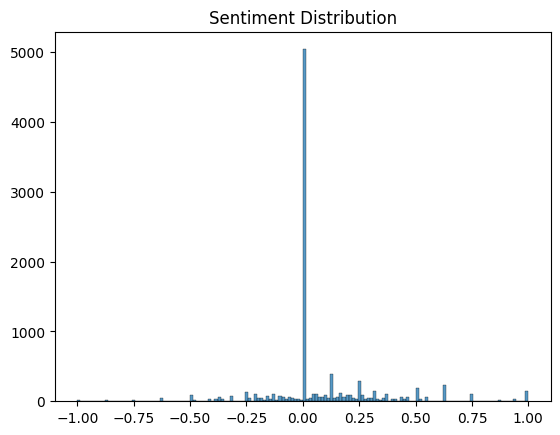

In [30]:
from wordcloud import WordCloud
from textblob import TextBlob

df = df.dropna(subset=['description'])
df['description'] = df['description'].astype(str)

# Apply sentiment analysis
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment distribution
sns.histplot(df['sentiment'])
plt.xlabel("")
plt.ylabel("")
plt.title("Sentiment Distribution")
plt.show()

# **Fake job postings titles**

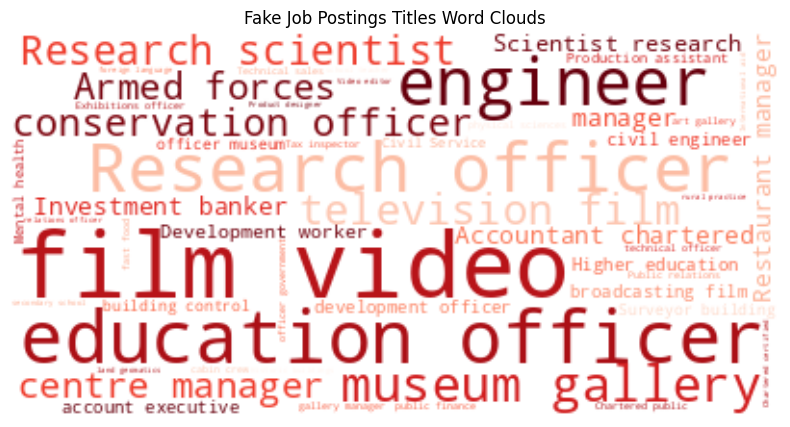

In [35]:
descriptions = " ".join(df["title"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='white', colormap='Reds').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Titles Word Clouds')
plt.show()

# **Fake job postings descriptions wording analysis**

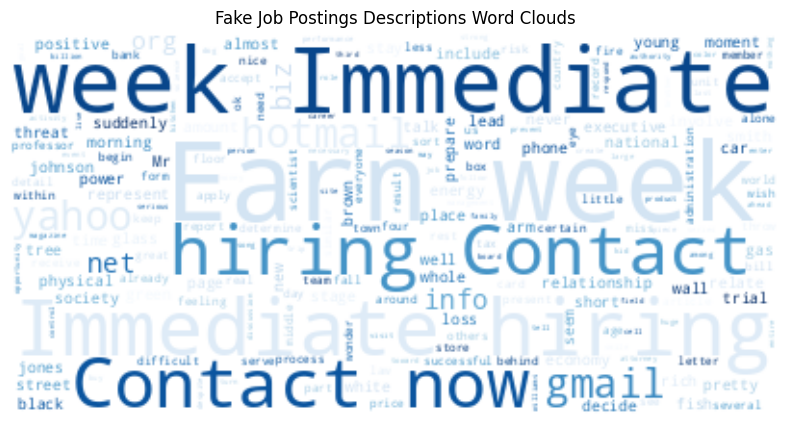

In [40]:
descriptions = " ".join(df["description"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='white', colormap='Blues').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Descriptions Word Clouds')
plt.show()

# **Most common requirements wording in fake job postings**

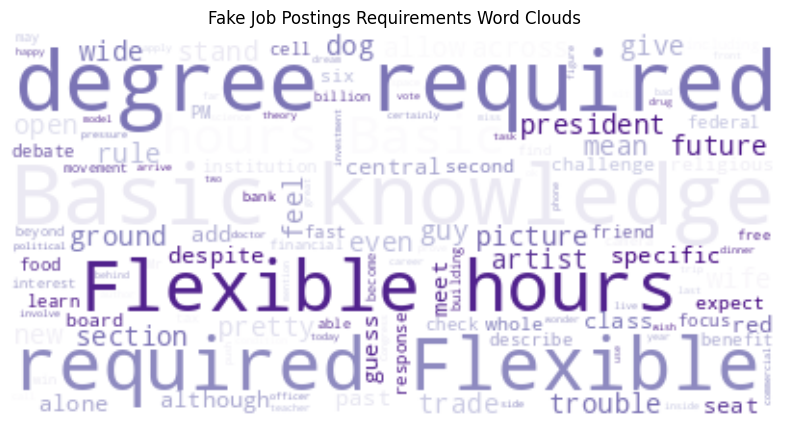

In [39]:
descriptions = " ".join(df["requirements"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='white', colormap='Purples').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Requirements Word Clouds')
plt.show()

# **Fake job postings - listed benefits tendencies**

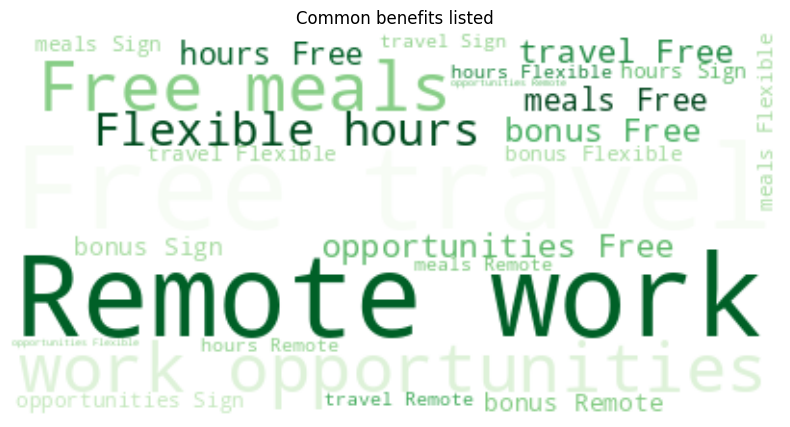

In [38]:
descriptions = " ".join(df["benefits"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='white', colormap='Greens').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Common benefits listed')
plt.show()

# **Most common employment types and industries used in fake job postings**

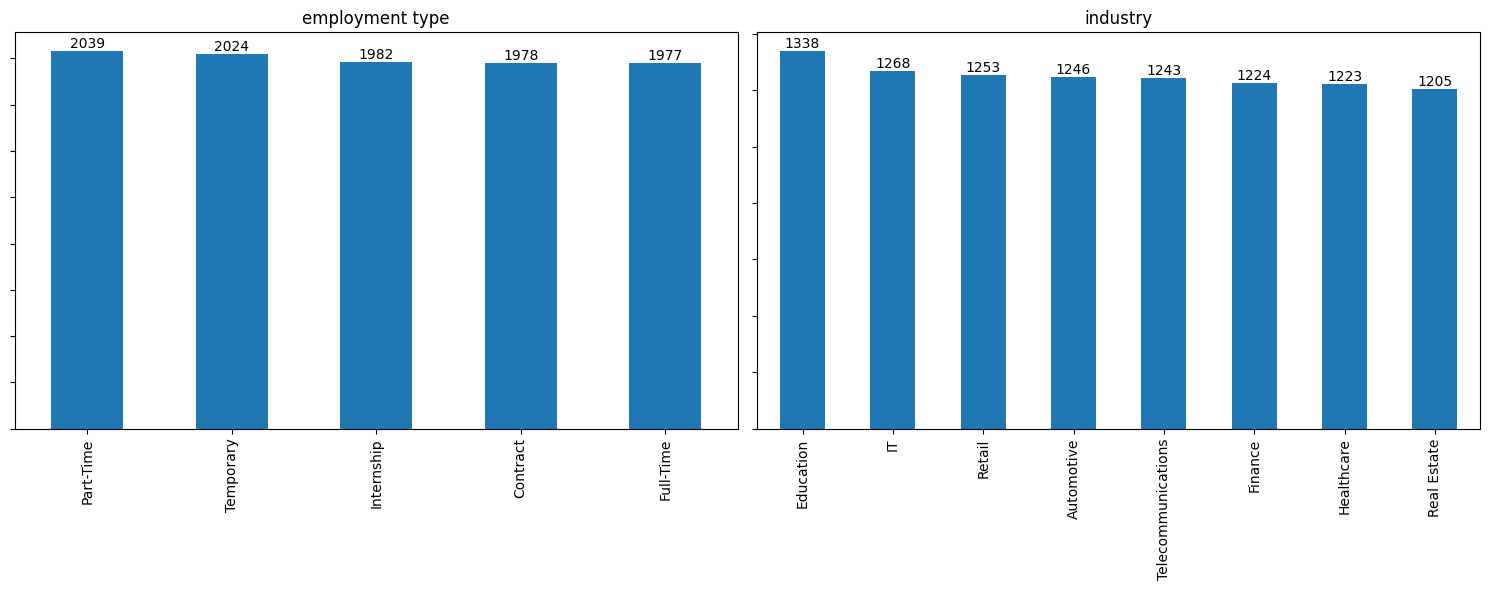

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

for i, j in enumerate(["employment_type", "industry"]):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# **Fake job postings - distribution of starting salaries**

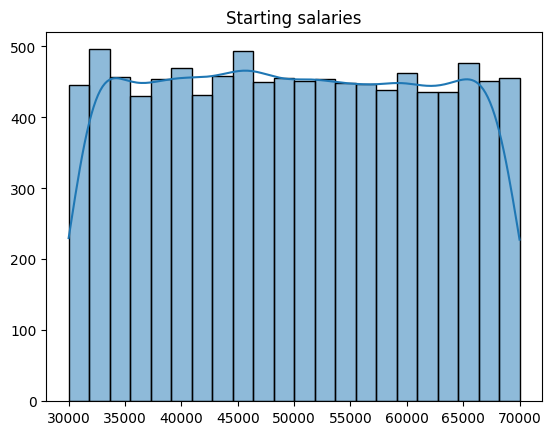

In [42]:
nums = "0123456789"
def process_start_salary(x):
    x = x.split('-')[0]
    x = x.strip()
    line = ""
    for i in x:
        if i in nums:
            line += i
    return int(line)

df["starting_salary"] = df["salary_range"].apply(process_start_salary)

sns.histplot(df, x="starting_salary", kde=True)
plt.xlabel("")
plt.ylabel("")
plt.title("Starting salaries")
plt.show()